# Covid-19 Impact On Workplace Stress Prediction

Import Libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Model
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("covid_impact_on_work new.csv")
print(df)

     Stress_Level     Sector  Increased_Work_Hours  Work_From_Home  \
0             Low     Retail                     1               1   
1             Low         IT                     1               1   
2          Medium     Retail                     1               0   
3          Medium  Education                     1               1   
4          Medium  Education                     0               1   
...           ...        ...                   ...             ...   
9995       Medium         IT                     1               1   
9996       Medium         IT                     0               0   
9997          Low     Retail                     1               1   
9998       Medium  Education                     1               1   
9999       Medium     Retail                     0               0   

        Hours_Worked_Per_Day        Meetings_Per_Day  Productivity_Change  \
0      6.392.393.639.805.820  26.845.944.014.488.700                    1   
1    

In [3]:
df.shape

(10000, 15)

Data Cleaning and Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Stress_Level                   10000 non-null  object
 1   Sector                         10000 non-null  object
 2   Increased_Work_Hours           10000 non-null  int64 
 3   Work_From_Home                 10000 non-null  int64 
 4   Hours_Worked_Per_Day           10000 non-null  object
 5   Meetings_Per_Day               10000 non-null  object
 6   Productivity_Change            10000 non-null  int64 
 7   Health_Issue                   10000 non-null  int64 
 8   Job_Security                   10000 non-null  int64 
 9   Childcare_Responsibilities     10000 non-null  int64 
 10  Commuting_Changes              10000 non-null  int64 
 11  Technology_Adaptation          10000 non-null  int64 
 12  Salary_Changes                 10000 non-null  int64 
 13  Te

In [5]:
df.isnull().sum()

Stress_Level                     0
Sector                           0
Increased_Work_Hours             0
Work_From_Home                   0
Hours_Worked_Per_Day             0
Meetings_Per_Day                 0
Productivity_Change              0
Health_Issue                     0
Job_Security                     0
Childcare_Responsibilities       0
Commuting_Changes                0
Technology_Adaptation            0
Salary_Changes                   0
Team_Collaboration_Challenges    0
Affected_by_Covid                0
dtype: int64

In [6]:
print(df['Hours_Worked_Per_Day'].unique())
print(df['Meetings_Per_Day'].unique())

['6.392.393.639.805.820' '9.171.983.537.957.560' '10.612.560.951.456.400'
 ... '1.017.621.058.520.080' '11.903.972.863.377.200'
 '8.443.284.185.945.760']
['26.845.944.014.488.700' '33.392.245.834.602.800' '2.218.332.712.302.110'
 ... '10.396.886.350.092.200' '3.756.724.961.448.690'
 '4.225.793.569.107.430']


In [7]:
#Convert to string first
df['Hours_Worked_Per_Day'] = df['Hours_Worked_Per_Day'].astype(str)
df['Meetings_Per_Day'] = df['Meetings_Per_Day'].astype(str)

In [8]:
#Remove commas and unwanted characters
df['Hours_Worked_Per_Day'] = df['Hours_Worked_Per_Day'].str.replace(',', '').str.extract('(\d+\.?\d*)')
df['Meetings_Per_Day'] = df['Meetings_Per_Day'].str.replace(',', '').str.extract('(\d+\.?\d*)')

In [9]:
#Convert back to float
df['Hours_Worked_Per_Day'] = pd.to_numeric(df['Hours_Worked_Per_Day'], errors='coerce')
df['Meetings_Per_Day'] = pd.to_numeric(df['Meetings_Per_Day'], errors='coerce')

In [10]:
#Drop NA rows (optional but safe)
df.dropna(subset=['Hours_Worked_Per_Day', 'Meetings_Per_Day'], inplace=True)

In [11]:
#Reset index
df.reset_index(drop=True, inplace=True)

print(df[['Hours_Worked_Per_Day', 'Meetings_Per_Day']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hours_Worked_Per_Day  10000 non-null  float64
 1   Meetings_Per_Day      10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB
None


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Hours_Worked_Per_Day', 'Meetings_Per_Day']] = scaler.fit_transform(df[['Hours_Worked_Per_Day', 'Meetings_Per_Day']])


Exploratory Data Analysis (EDA)

1. Visualize Stress Level Distribution Across Sectors

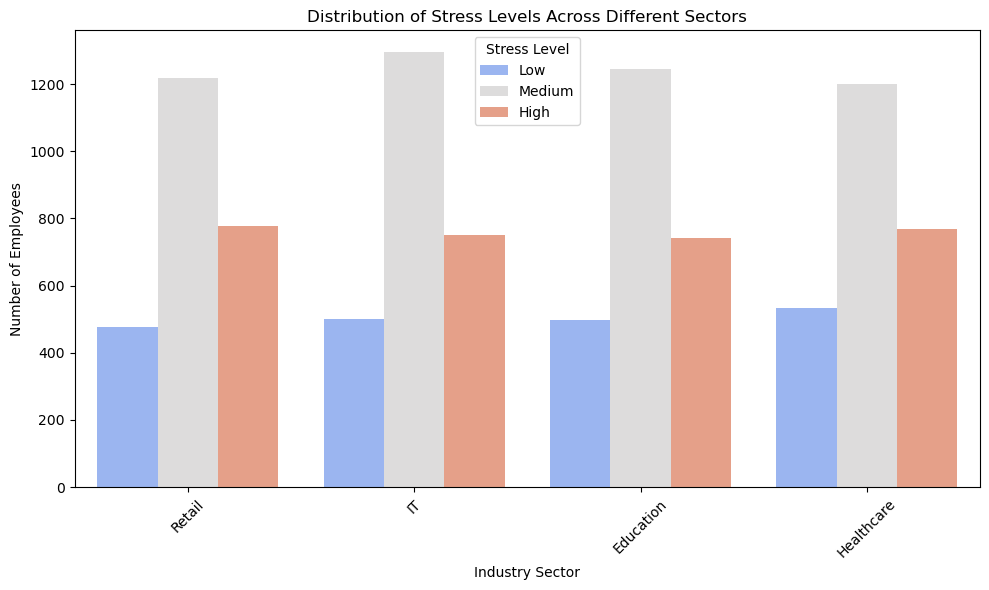

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Sector', hue='Stress_Level', palette='coolwarm')
plt.title('Distribution of Stress Levels Across Different Sectors')
plt.xticks(rotation=45)
plt.xlabel('Industry Sector')
plt.ylabel('Number of Employees')
plt.legend(title='Stress Level')
plt.tight_layout()
plt.show()


2. Analyze Relationship Between Increased Work Hours, Health Issue, and Stress Level

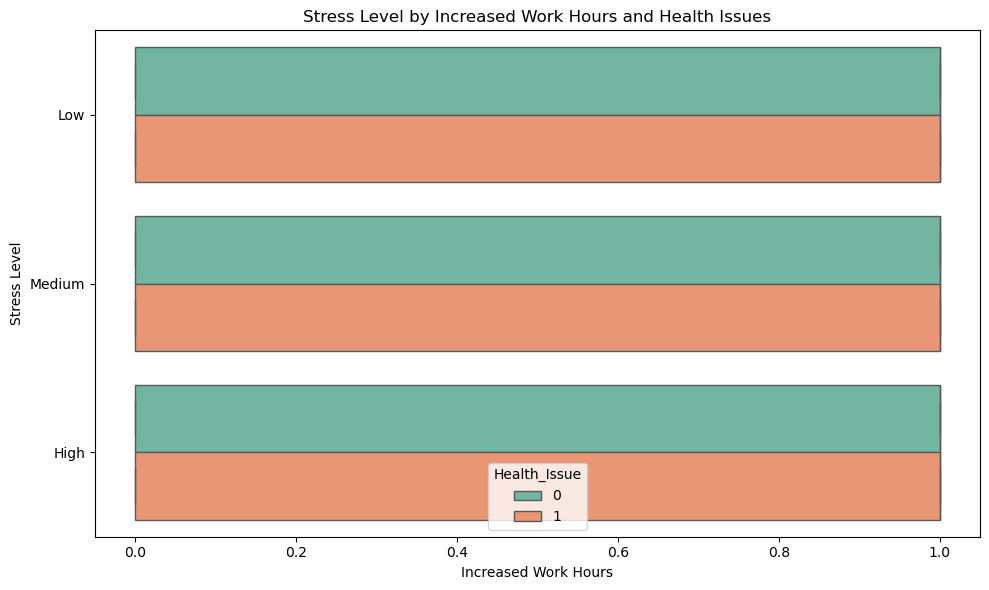

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Increased_Work_Hours', y='Stress_Level', hue='Health_Issue', palette='Set2')
plt.title('Stress Level by Increased Work Hours and Health Issues')
plt.xlabel('Increased Work Hours')
plt.ylabel('Stress Level')
plt.tight_layout()
plt.show()


 3. Childcare Responsibilities & Tech Adaptation vs Productivity & Stress

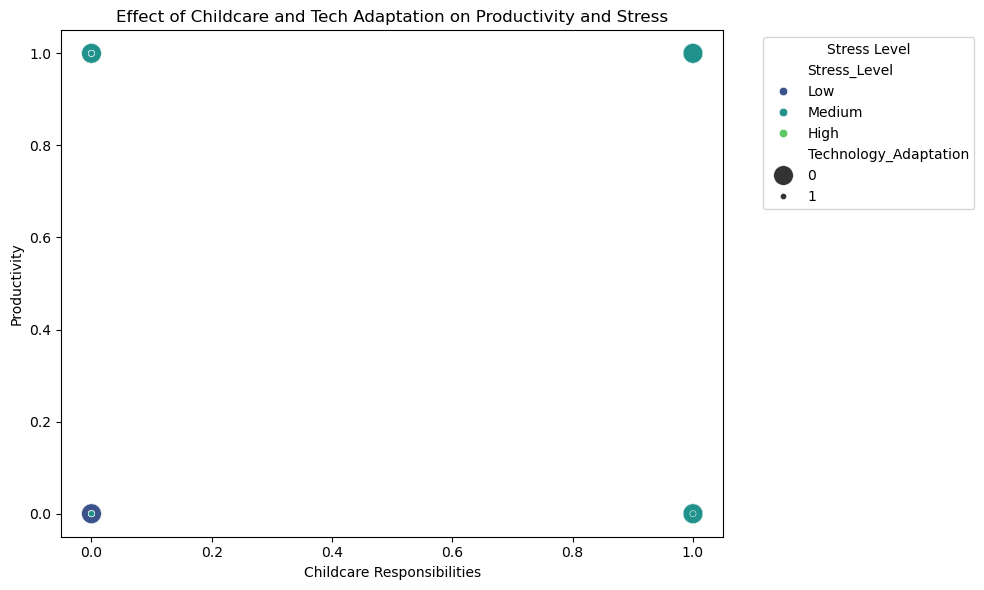

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Childcare_Responsibilities', y='Productivity_Change', hue='Stress_Level', size='Technology_Adaptation', palette='viridis', sizes=(20, 200))
plt.title('Effect of Childcare and Tech Adaptation on Productivity and Stress')
plt.xlabel('Childcare Responsibilities')
plt.ylabel('Productivity')
plt.legend(title='Stress Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Feature Engineering

In [16]:
binary_cols = ['Work_From_Home', 'Increased_Work_Hours', 'Health_Issue']
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})

In [17]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Sector', 'Stress_Level', 'Productivity_Change', 'Technology_Adaptation']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [18]:
# Binary features already encoded, so we can add them
df['Total_Responsibility'] = df['Childcare_Responsibilities'] + df['Health_Issue'] + df['Work_From_Home']
df['Working_Burden'] = df['Hours_Worked_Per_Day'] + df['Meetings_Per_Day']

Modeling

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(['Stress_Level'], axis=1)
y = df['Stress_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Initialize models
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
svm = SVC()

# Train models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predictions
y_pred_log = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)


In [21]:
def evaluate_model(name, y_test, y_pred):
    print(f"📌 Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

# Evaluate
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("SVM", y_test, y_pred_svm)


📌 Model: Logistic Regression
Accuracy: 0.505
F1 Score: 0.3389036544850498
Confusion Matrix:
 [[   0    0  580]
 [   0    0  410]
 [   0    0 1010]]
--------------------------------------------------
📌 Model: Random Forest
Accuracy: 0.457
F1 Score: 0.39314896710448
Confusion Matrix:
 [[114  23 443]
 [ 79  16 315]
 [175  51 784]]
--------------------------------------------------
📌 Model: SVM
Accuracy: 0.5035
F1 Score: 0.33857190412782956
Confusion Matrix:
 [[   0    1  579]
 [   2    0  408]
 [   3    0 1007]]
--------------------------------------------------


Model Evaluation:

In [22]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Apply GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid_rf.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_rf.best_params_)
print("Best F1 Score:", grid_rf.best_score_)

# Evaluate best model
best_rf = grid_rf.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("F1 Score:", f1_score(y_test, y_pred_rf_best, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best))


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 Score: 0.38323083966414123
Final Accuracy: 0.4695
F1 Score: 0.3980113020127013
Confusion Matrix:
 [[107  18 455]
 [ 62  17 331]
 [161  34 815]]


In [23]:
from sklearn.model_selection import cross_val_score

# Random Forest cross-validation
rf_scores = cross_val_score(best_rf, X, y, cv=5, scoring='accuracy')
print("Cross-validation Accuracy:", rf_scores.mean())


Cross-validation Accuracy: 0.4507


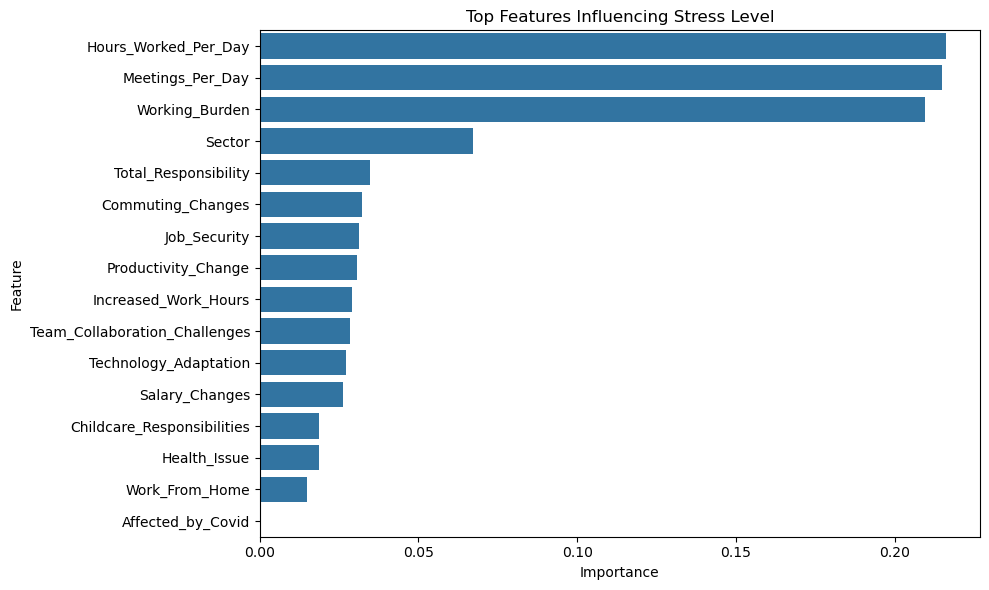

In [24]:
# Visualize feature importance
import matplotlib.pyplot as plt
import seaborn as sns

importances = best_rf.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Top Features Influencing Stress Level')
plt.tight_layout()
plt.show()


 Deployment as a Web Application using Streamlit:

In [25]:
import joblib
joblib.dump(best_rf, 'best_rf_model.pkl')

['best_rf_model.pkl']

In [26]:
import streamlit as st
import joblib

# Load the trained model
model = joblib.load('best_rf_model.pkl')

# Set up the Streamlit app interface
st.title('Employee Stress Level Predictor')
st.subheader('Enter employee characteristics to predict stress level')

# Input fields for employee characteristics
age = st.number_input('Age of Employee', min_value=18, max_value=100, value=30)
hours_worked = st.number_input('Hours Worked per Week', min_value=0, max_value=100, value=40)
work_experience = st.number_input('Years of Work Experience', min_value=0, max_value=50, value=5)
# Add more inputs based on your dataset

# Prepare the input data as a dictionary 
employee_data = {
    'Age': age,
    'Hours Worked': hours_worked,
    'Work Experience': work_experience
    # Add other inputs here
}

# Convert the input data to a format compatible with the model 
input_data = pd.DataFrame([employee_data])

# Predict the stress level using the trained model
if st.button('Predict Stress Level'):
    stress_level = model.predict(input_data)  
    st.write(f"Predicted Stress Level: {stress_level[0]}")


2025-04-19 18:36:09.451 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 18:36:10.078 
  command:

    streamlit run C:\Users\Pooja Mahajan\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-19 18:36:10.078 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 18:36:10.080 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 18:36:10.080 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 18:36:10.081 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 18:36:10.082 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 18:36:10.082 Thread 'MainThr

2025-04-19 18:36:10.121 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 18:36:10.123 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 18:36:10.213 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 18:36:10.511 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 18:36:10.512 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

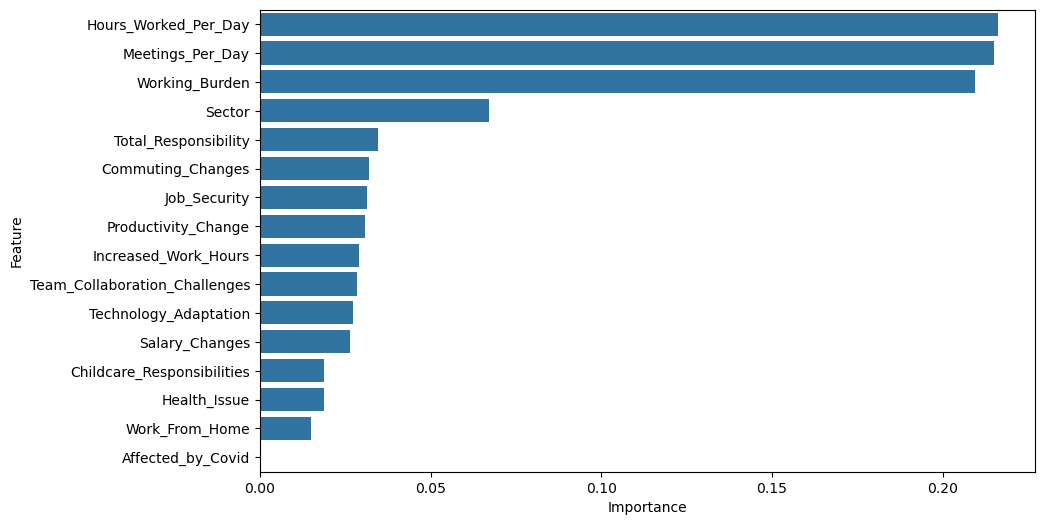

In [27]:
# Display feature importance graph in the app
st.subheader('Key Contributors to Stress')

# Show the feature importance graph
importances = best_rf.feature_importances_
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df, ax=ax)
st.pyplot(fig)


In [ ]:
streamlit run app.py